In [1]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


In [ ]:
# Train the model
results = model.train(data=r'C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\datasets\data.yaml', epochs=5, imgsz=640)

In [15]:

from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO(r'C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\runs\detect\train3\weights\best.pt')

results = model.predict(r'C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\test_verileri\test1.mp4', imgsz=320, conf=0.2)
subset_results = results[::30]



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/730) C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\test_verileri\test1.mp4: 224x320 1 0, 43.2ms
video 1/1 (frame 2/730) C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\test_verileri\test1.mp4: 224x320 1 0, 38.5ms
video 1/1 (frame 3/730) C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\test_verileri\test1.mp4: 224x320 1 0, 38.0ms
video 1/1 (frame 4/730) C:\Users\GulerKandeger\Desktop\Plate Detection w

In [4]:
print(len(subset_results))

20


In [16]:
#25 tane tensor'un koordinatlarını alıyor.

coordinates = []
for frame_result in subset_results:
    boxes = frame_result.boxes
    for box in boxes:
        coordinates.append(box.xyxy)
print(f"koordinatlar: {coordinates}")

koordinatlar: [tensor([[498.4004, 608.4670, 620.7290, 636.9719]]), tensor([[498.1041, 608.5497, 620.7924, 637.0739]]), tensor([[498.0962, 608.5492, 620.7984, 637.0710]]), tensor([[498.0486, 608.5459, 620.9368, 637.1194]]), tensor([[498.0624, 608.5526, 620.9206, 637.1039]]), tensor([[498.1152, 608.5574, 620.8164, 637.0721]]), tensor([[441.9169, 599.9811, 836.6343, 678.2724]]), tensor([[442.0391, 600.2247, 836.7930, 678.2207]]), tensor([[441.8470, 599.9846, 836.8364, 678.3236]]), tensor([[578.5170, 431.2240, 715.1940, 465.7177]]), tensor([[578.5170, 431.2240, 715.1940, 465.7177]]), tensor([[578.5170, 431.2240, 715.1940, 465.7177]]), tensor([[576.3549, 466.9915, 803.0138, 512.3488]]), tensor([[576.3782, 467.0314, 803.0309, 512.4084]]), tensor([[576.3782, 467.0314, 803.0309, 512.4084]]), tensor([[521.8329, 482.4238, 715.4329, 522.6296]]), tensor([[521.8329, 482.4238, 715.4329, 522.6296]]), tensor([[379.4910, 378.1014, 978.3769, 515.3745]]), tensor([[379.7654, 378.4642, 979.2896, 515.4485]]

In [17]:
import numpy as np 
   
coords_np = []
for coord in coordinates:
    coord_np = np.array(coord).astype(int)
    coords_np.append(coord_np)
    
print(coords_np)

[array([[498, 608, 620, 636]]), array([[498, 608, 620, 637]]), array([[498, 608, 620, 637]]), array([[498, 608, 620, 637]]), array([[498, 608, 620, 637]]), array([[498, 608, 620, 637]]), array([[441, 599, 836, 678]]), array([[442, 600, 836, 678]]), array([[441, 599, 836, 678]]), array([[578, 431, 715, 465]]), array([[578, 431, 715, 465]]), array([[578, 431, 715, 465]]), array([[576, 466, 803, 512]]), array([[576, 467, 803, 512]]), array([[576, 467, 803, 512]]), array([[521, 482, 715, 522]]), array([[521, 482, 715, 522]]), array([[379, 378, 978, 515]]), array([[379, 378, 979, 515]]), array([[379, 378, 978, 515]]), array([[738, 426, 863, 462]]), array([[738, 426, 863, 462]]), array([[738, 426, 863, 462]]), array([[560, 414, 717, 445]]), array([[560, 414, 717, 445]])]


In [18]:
#Videoda her saniyesinde bir frame alır
import cv2

video_path = r'C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\test_verileri\test1.mp4'
cap = cv2.VideoCapture(video_path)

frames_list = []
frame_count = 0
fps = cap.get(cv2.CAP_PROP_FPS)  
seconds_per_frame = int(fps)

while True:
    ret, frame = cap.read()
    if not ret:
        break
        
    if frame_count % seconds_per_frame == 0: 
        frames_list.append(frame)
    
    frame_count += 1

cap.release()

print(len(frames_list))

25


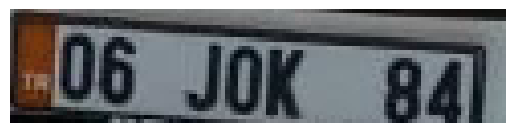

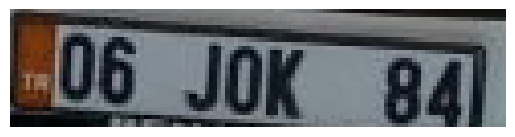

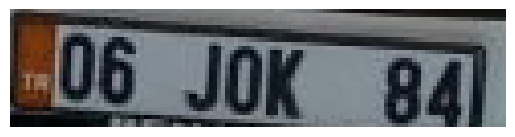

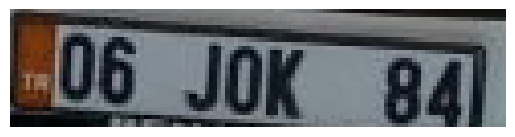

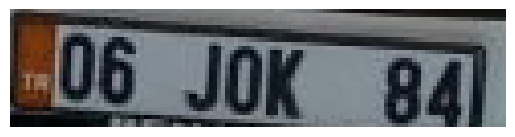

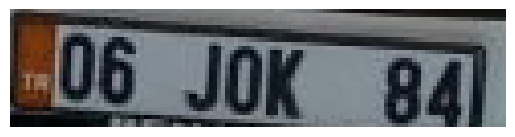

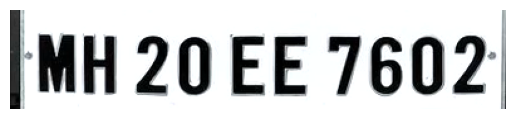

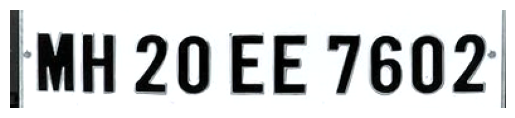

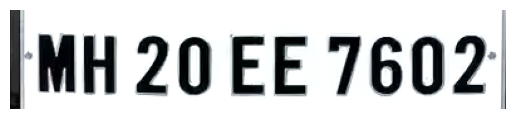

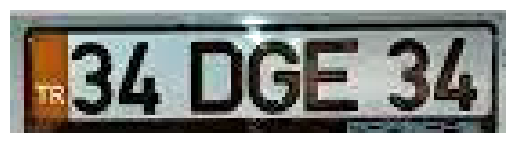

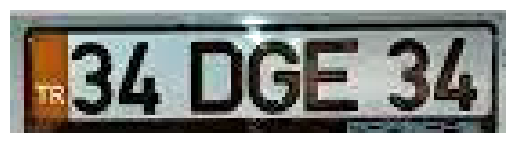

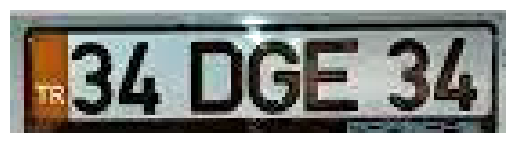

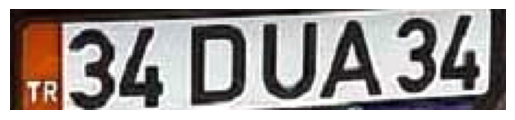

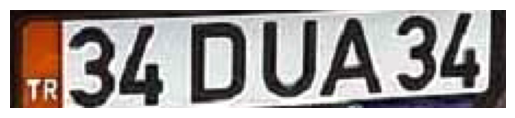

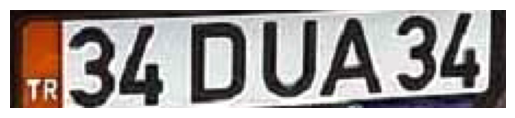

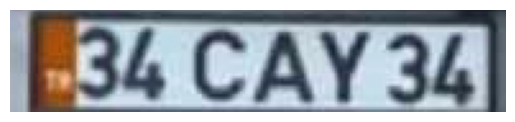

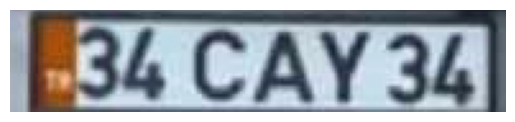

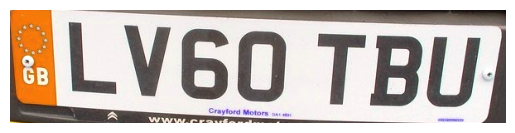

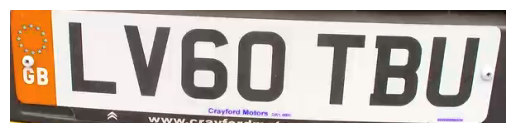

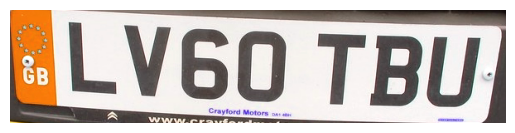

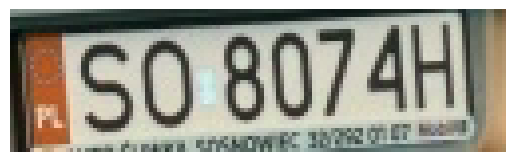

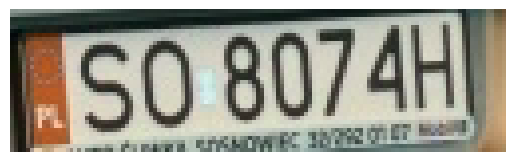

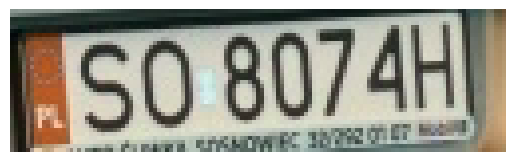

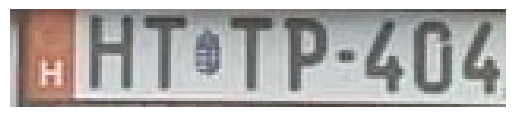

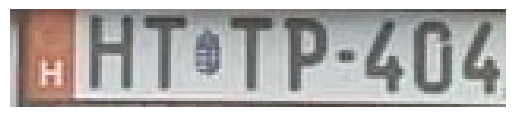

In [19]:
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
%matplotlib inline

coords = []
cropped_imgs = []
for i in range(len(coords_np)):
    tmp = coords_np[i]
    tmp = tmp[0]
    x, y, w, h = tmp[0], tmp[1], tmp[2], tmp[3]
    img = frames_list[i]
    cropped_img = img[y:h, x:w]
    cropped_imgs.append(cropped_img)
    plt.imshow(cropped_img, cmap="gray")
    plt.axis('off')  
    plt.show()


In [20]:
#Plakaları Dosyaya Kaydetme FONKSİYON

from datetime import datetime

def write(plaka):
    f = open(r"C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\plaka_kayit.txt", "r")
    result = f.read().find(plaka)
    f.close()
    if result == -1:
        time = datetime.now()
        formatted_time = time.strftime("%Y-%m-%d %H:%M")
        f = open(r"C:\Users\GulerKandeger\Desktop\Plate Detection with YoloV8\plaka_kayit.txt", "a")    
        f.write(plaka + "********")
        f.write(str(formatted_time) + "\n")
        f.close()        

In [21]:
#Okunan veriyi düzenleme FONKSİYON

import re

def format_text(ocr_result):
    formatted_results = []
    upper_text = ocr_result.upper()
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', upper_text)
    formatted_item = ''
    prev_char = None
    for char in cleaned_text:
        if char.isdigit() and (prev_char is None or prev_char.isdigit()):
            formatted_item += char
        elif char.isalpha() and (prev_char is None or prev_char.isalpha()):
            formatted_item += char
        elif char.isspace():
            pass    
        else:
            formatted_item += ' '+char
        prev_char = char
    formatted_results.append(formatted_item.strip())
    return formatted_results

In [22]:
#EasyOCR ile okuma

import easyocr

reader = easyocr.Reader(['en']) 

for i in range(len(cropped_imgs)):
    img = cropped_imgs[i]
    plaka = reader.readtext(img)
    result = [text[1] for text in plaka]
    result = ' '.join(result)
    formatted_result = format_text(result)
    print(formatted_result[0])
    write(formatted_result[0])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


06 JOK 84
06 JOK 84
06 JOK 84
06 JOK 84
06 JOK 84
06 JOK 84
MH 20 EE 7602
MH 20 EE 7602
MH 20 EE 7602
B 4 DGE 34
B 4 DGE 34
B 4 DGE 34
34 DUA 34
34 DUA 34
34 DUA 34
3 LCAY 34
3 LCAY 34
GB LV 6 O TBU
GB LV 6 O TBU
GB LV 6 O TBU
SO 8074
SO 8074
SO 8074
HT TP 40 L
HT TP 40 L
